# 데이터 분석: 전처리 및 탐색적 데이터 분석 (EDA)

이 노트북은 `data_weekly_260120.csv` 데이터에 대한 전처리 및 탐색적 데이터 분석(EDA)을 수행합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Mac OS: AppleGothic, Windows: Malgun Gothic)
import platform
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 디스플레이 설정
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

## 1. 데이터 로드 및 전처리

In [2]:
# 데이터 로드
df = pd.read_csv('data_weekly_260120.csv')

# 'dt' 컬럼을 날짜 형식으로 변환
df['dt'] = pd.to_datetime(df['dt'])

# 인덱스 설정
df.set_index('dt', inplace=True)
df.sort_index(inplace=True)

# 데이터 형태 및 상위 5개 행 확인
print(f"데이터 크기 (Shape): {df.shape}")
df.head()

데이터 크기 (Shape): (668, 74)


,Com_LME_Ni_Cash,Com_LME_Cu_Cash,Com_LME_Al_Cash,Com_LME_Pb_Cash,Com_LME_Sn_Cash,Com_LME_Zn_Cash,Com_LME_Ni_Inv,Com_LME_Cu_Inv,Com_LME_Al_Inv,Com_LME_Pb_Inv,Com_LME_Sn_Inv,Com_LME_Zn_Inv,EX_USD_CNY,EX_USD_KRW,EX_USD_JPY,EX_AUD_USD,EX_USD_BRL,EX_INR_USD,Idx_DxyUSD,Idx_SnP500,Idx_SnPVIX,Idx_CH50,Idx_CSI300,Idx_Shanghai50,Idx_Shanghai,Idx_HangSeng,Idx_SnPGlobal1200,Bonds_CHN_30Y,Bonds_CHN_20Y,Bonds_CHN_10Y,Bonds_CHN_5Y,Bonds_CHN_2Y,Bonds_CHN_1Y,Bonds_US_10Y,Bonds_US_2Y,Bonds_US_1Y,Bonds_US_3M,Bonds_AUS_10Y,Bonds_AUS_1Y,Bonds_BRZ_10Y,Bonds_BRZ_1Y,Bonds_IND_10Y,Bonds_IND_1Y,Bonds_KOR_10Y,Bonds_KOR_1Y,Com_CrudeOil,Com_BrentCrudeOil,Com_Gasoline,Com_NaturalGas,Com_Uranium,Com_LME_Index,Com_HRC_Steel,Com_Iron_Ore,Com_Coal,Com_Steel,Com_Gold,Com_Silver,Com_Soybeans,Com_Wheat,Com_Rice,Com_Barley,Com_Cheese,Com_Corn,Com_Sugar,Com_Cocoa,Com_Milk,Com_OrangeJuice,Com_Coffee,Com_SunflowerOil,Com_PalmOil,Com_Canola,Com_Cotton,Com_Wool,Com_Lumber
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-01,16137.5,7388.125,1846.5,2049.375,22808.75,1840.375,166245.0,575556.25,5215025.0,261187.5,14352.5,1161087.5,6.19656,1122.176,94.704,1.04274,2.01196,54.555,82.7096,1559.874,13.676,7988.923333,2487.708433,1785.65130,2229.143420,22213.866,1593.696,4.252500,4.1075,3.541500,3.297500,3.0675,2.672500,1.804667,0.236000,0.132000,0.071933,3.354429,2.836286,9.928000,8.050,7.9620,7.72325,2.782,2.5030,94.934,107.868,2.96372,3.9912,42.23,3215.64,612.00,136.766,88.33,3663.666667,1573.040,27.264,1379.75,684.85,15.564,1347.416667,1.687400,636.65,17.620,2155.600000,17.262,140.300000,138.730,1105.0,2373.2,617.380,87.968999,1069.0,378.38
2013-04-08,16052.0,7502.000,1859.7,2056.700,22881.00,1865.700,167823.6,587740.00,5201175.0,260150.0,14447.0,1139060.0,6.18702,1134.956,99.238,1.04958,1.97774,54.458,82.4145,1580.326,12.538,7951.832000,2477.405160,1781.65936,2217.964994,21962.654,1614.908,4.228000,4.1340,3.469600,3.220000,3.0420,2.658000,1.759833,0.231714,0.124929,0.066243,3.270857,2.805286,9.632000,8.173,7.8920,7.71120,2.844,2.5210,93.400,104.812,2.86992,4.1090,41.44,3238.86,605.20,138.478,88.70,3726.000000,1551.004,27.248,1396.25,706.10,15.706,1330.083333,1.724800,647.30,17.838,2222.600000,17.566,145.290000,135.880,1096.0,2372.8,622.260,85.196001,1031.8,373.96
2013-04-15,15431.0,7068.800,1853.2,2007.900,20906.00,1841.800,169324.8,611665.00,5192090.0,259560.0,14574.0,1121380.0,6.17968,1118.376,97.998,1.03130,2.00306,54.124,82.4246,1555.160,16.054,7958.614000,2470.712040,1778.03888,2202.565468,21708.092,1591.564,4.226000,4.0960,3.464400,3.194600,3.0140,2.658000,1.697833,0.228829,0.113414,0.056586,3.221286,2.734714,9.653333,8.333,7.8032,7.62040,2.898,2.6260,87.970,99.354,2.75926,4.2640,40.39,3116.22,597.40,138.288,87.75,3557.000000,1378.328,23.126,1417.50,702.55,15.436,1314.200000,1.731333,653.40,17.862,2288.750000,17.636,147.800000,137.390,1095.0,2294.4,628.700,83.790997,998.2,362.72
2013-04-22,15177.0,6942.300,1868.7,2015.000,20766.00,1859.200,175142.4,618625.00,5167550.0,258740.0,14266.0,1092590.0,6.17134,1115.500,99.082,1.02744,2.01110,54.243,82.7970,1577.494,13.742,7965.470000,2478.180000,1784.56808,2204.448732,22196.596,1616.488,4.216667,4.0925,3.465333,3.236333,3.0500,2.831667,1.695667,0.224871,0.106843,0.053914,3.163833,2.658333,9.644000,8.056,7.7484,7.54620,2.838,2.6318,91.202,101.800,2.77650,4.1978,40.43,3086.96,595.75,138.018,87.43,3478.400000,1439.534,23.536,1419.05,696.30,14.942,1352.333333,1.729600,642.60,17.556,2332.333333,17.604,142.850000,137.910,1083.0,2288.4,636.920,84.323000,999.4,354.66
2013-04-29,15028.0,7004.000,1822.5,1991.800,20255.00,1833.000,177632.4,615850.00,5161920.0,254465.0,13976.0,1064385.0,6.15868,1100.906,97.902,1.03102,2.00544,53.826,81.9400,1597.178,13.632,7957.240000,2471.275800,1779.26920,2189.809935,22682.610,1644.350,4.222000,3.9890,3.409200,3.127500,2.9650,2.769000,1.667167,0.210829,0.106614,0.052343,3.088714,2.571857,9.570000,8.092,7.7364,7.52060,2.760,2.5325,93.718,102.634,2.79074,4.2254,40.50,

In [3]:
# 결측치 확인
missing = df.isnull().sum()
print("결측치 있는 컬럼:\n", missing[missing > 0])

# 시계열 연속성 확인 (주간 데이터)
date_diff = df.index.to_series().diff().dropna()
print("\n고유 시간 간격:", date_diff.unique())

if (date_diff.dt.days != 7).any():
    print("경고: 주간 데이터에 누락된 구간이 있습니다!")
else:
    print("시간 인덱스가 정확히 주간(7일) 간격으로 연속됩니다.")

결측치 있는 컬럼:
 Series([], dtype: int64)

고유 시간 간격: <TimedeltaArray>
['7 days']
Length: 1, dtype: timedelta64[ns]
시간 인덱스가 정확히 주간(7일) 간격으로 연속됩니다.


## 2. 피처 엔지니어링 (파생변수 생성)

분석을 위해 두 가지 형태의 데이터를 추가로 생성합니다:
1. **정규화 데이터 (Min-Max Scaling)**: 서로 다른 단위의 변수들 간 추세를 비교하기 위함.
2. **변화율 데이터 (Percentage Change)**: 단순 가격/지수가 아닌 수익률(변동성)의 상관관계를 분석하기 위함.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# 1. Min-Max 정규화 (0~1 사이 값으로 변환)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# 2. 퍼센트 변화율 (수익률)
df_pct = df.pct_change().dropna()

## 3. EDA: 기초 통계량

In [5]:
df.describe()

,Com_LME_Ni_Cash,Com_LME_Cu_Cash,Com_LME_Al_Cash,Com_LME_Pb_Cash,Com_LME_Sn_Cash,Com_LME_Zn_Cash,Com_LME_Ni_Inv,Com_LME_Cu_Inv,Com_LME_Al_Inv,Com_LME_Pb_Inv,Com_LME_Sn_Inv,Com_LME_Zn_Inv,EX_USD_CNY,EX_USD_KRW,EX_USD_JPY,EX_AUD_USD,EX_USD_BRL,EX_INR_USD,Idx_DxyUSD,Idx_SnP500,Idx_SnPVIX,Idx_CH50,Idx_CSI300,Idx_Shanghai50,Idx_Shanghai,Idx_HangSeng,Idx_SnPGlobal1200,Bonds_CHN_30Y,Bonds_CHN_20Y,Bonds_CHN_10Y,Bonds_CHN_5Y,Bonds_CHN_2Y,Bonds_CHN_1Y,Bonds_US_10Y,Bonds_US_2Y,Bonds_US_1Y,Bonds_US_3M,Bonds_AUS_10Y,Bonds_AUS_1Y,Bonds_BRZ_10Y,Bonds_BRZ_1Y,Bonds_IND_10Y,Bonds_IND_1Y,Bonds_KOR_10Y,Bonds_KOR_1Y,Com_CrudeOil,Com_BrentCrudeOil,Com_Gasoline,Com_NaturalGas,Com_Uranium,Com_LME_Index,Com_HRC_Steel,Com_Iron_Ore,Com_Coal,Com_Steel,Com_Gold,Com_Silver,Com_Soybeans,Com_Wheat,Com_Rice,Com_Barley,Com_Cheese,Com_Corn,Com_Sugar,Com_Cocoa,Com_Milk,Com_OrangeJuice,Com_Coffee,Com_SunflowerOil,Com_PalmOil,Com_Canola,Com_Cotton,Com_Wool,Com_Lumber
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,6.680000e+02,668.000000,668.000000,6.680000e+02,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,15521.658782,7325.798141,2084.675374,2057.015681,23808.332859,2590.496756,233900.771108,221116.307310,1.864446e+06,144621.251896,5106.920908,3.125897e+05,6.711392,1198.212507,120.251661,0.738744,4.185298,72.311373,96.100440,3382.527155,17.740199,12153.902776,3729.273941,2575.927885,3089.633363,23726.479285,2683.849729,3.570210,3.507446,3.083569,2.879914,2.643872,2.473376,2.630470,1.930456,1.858673,1.759390,2.880296,2.134251,11.249097,10.144998,7.154224,6.472289,2.585113,2.035464,66.641637,71.282825,2.037908,3.308692,41.938829,3347.223246,775.093068,98.985654,117.712809,3520.270896,1716.043115,21.905297,1129.137943,578.422087,13.342002,1823.165106,1.790340,448.470580,16.639250,3502.188180,17.672192,185.891671,169.328168,979.529111,3159.218766,598.501183,77.316175,1012.619528,486.769142
std,4760.673476,1724.633587,418.306229,206.536437,7226.272019,534.628307,125427.285422,117036.663346,1.559256e+06,71754.912800,3421.441510,2.685192e+05,0.379158,115.956500,17.663017,0.086725,1.162262,8.669841,7.222279,1394.230118,6.620195,2757.520960,765.175194,523.189032,489.903221,3682.145863,834.583094,0.758862,0.693618,0.672829,0.698574,0.716537,0.712127,1.061542,1.603640,1.811021,1.939131,1.122596,1.257594,2.264867,3.651380,0.765296,1.402573,0.743486,0.860603,19.797572,20.712312,0.574159,1.298035,20.347255,700.803007,313.463083,33.634520,83.251483,825.035511,661.380372,8.360113,229.685530,135.332006,2.510122,490.543050,0.243273,112.071120,3.785922,2154.760835,2.800380,98.023439,74.368427,314.704567,999.771861,173.606906,16.285068,535.767046,219.972490
min,7925.000000,4362.700000,1432.500000,1587.600000,13404.000000,1467.200000,36996.000000,51945.000000,2.333950e+05,20230.000000,660.000000,1.680000e+04,6.023140,1009.700000,94.704000,0.586850,1.977740,53.826000,79.218250,1555.160000,9.340000,6436.522000,2116.749940,1420.818300,1960.691384,15190.990000,1584.142000,1.819750,1.884000,1.619000,1.384800,1.071800,0.940600,0.549686,0.112067,0.041667,-0.001000,0.722571,0.003667,6.415000,2.330417,5.786200,3.344600,1.212286,0.564429,15.760000,21.608000,0.622320,1.558800,18.080000,2065.020000,364.000000,38.730000,48.930000,1587.200000,1062.538000,12.556800,809.350000,367.250000,9.262500,1117.000000,1.238800,308.9500

## 4. EDA: 상관관계 분석

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  fig.canvas.p

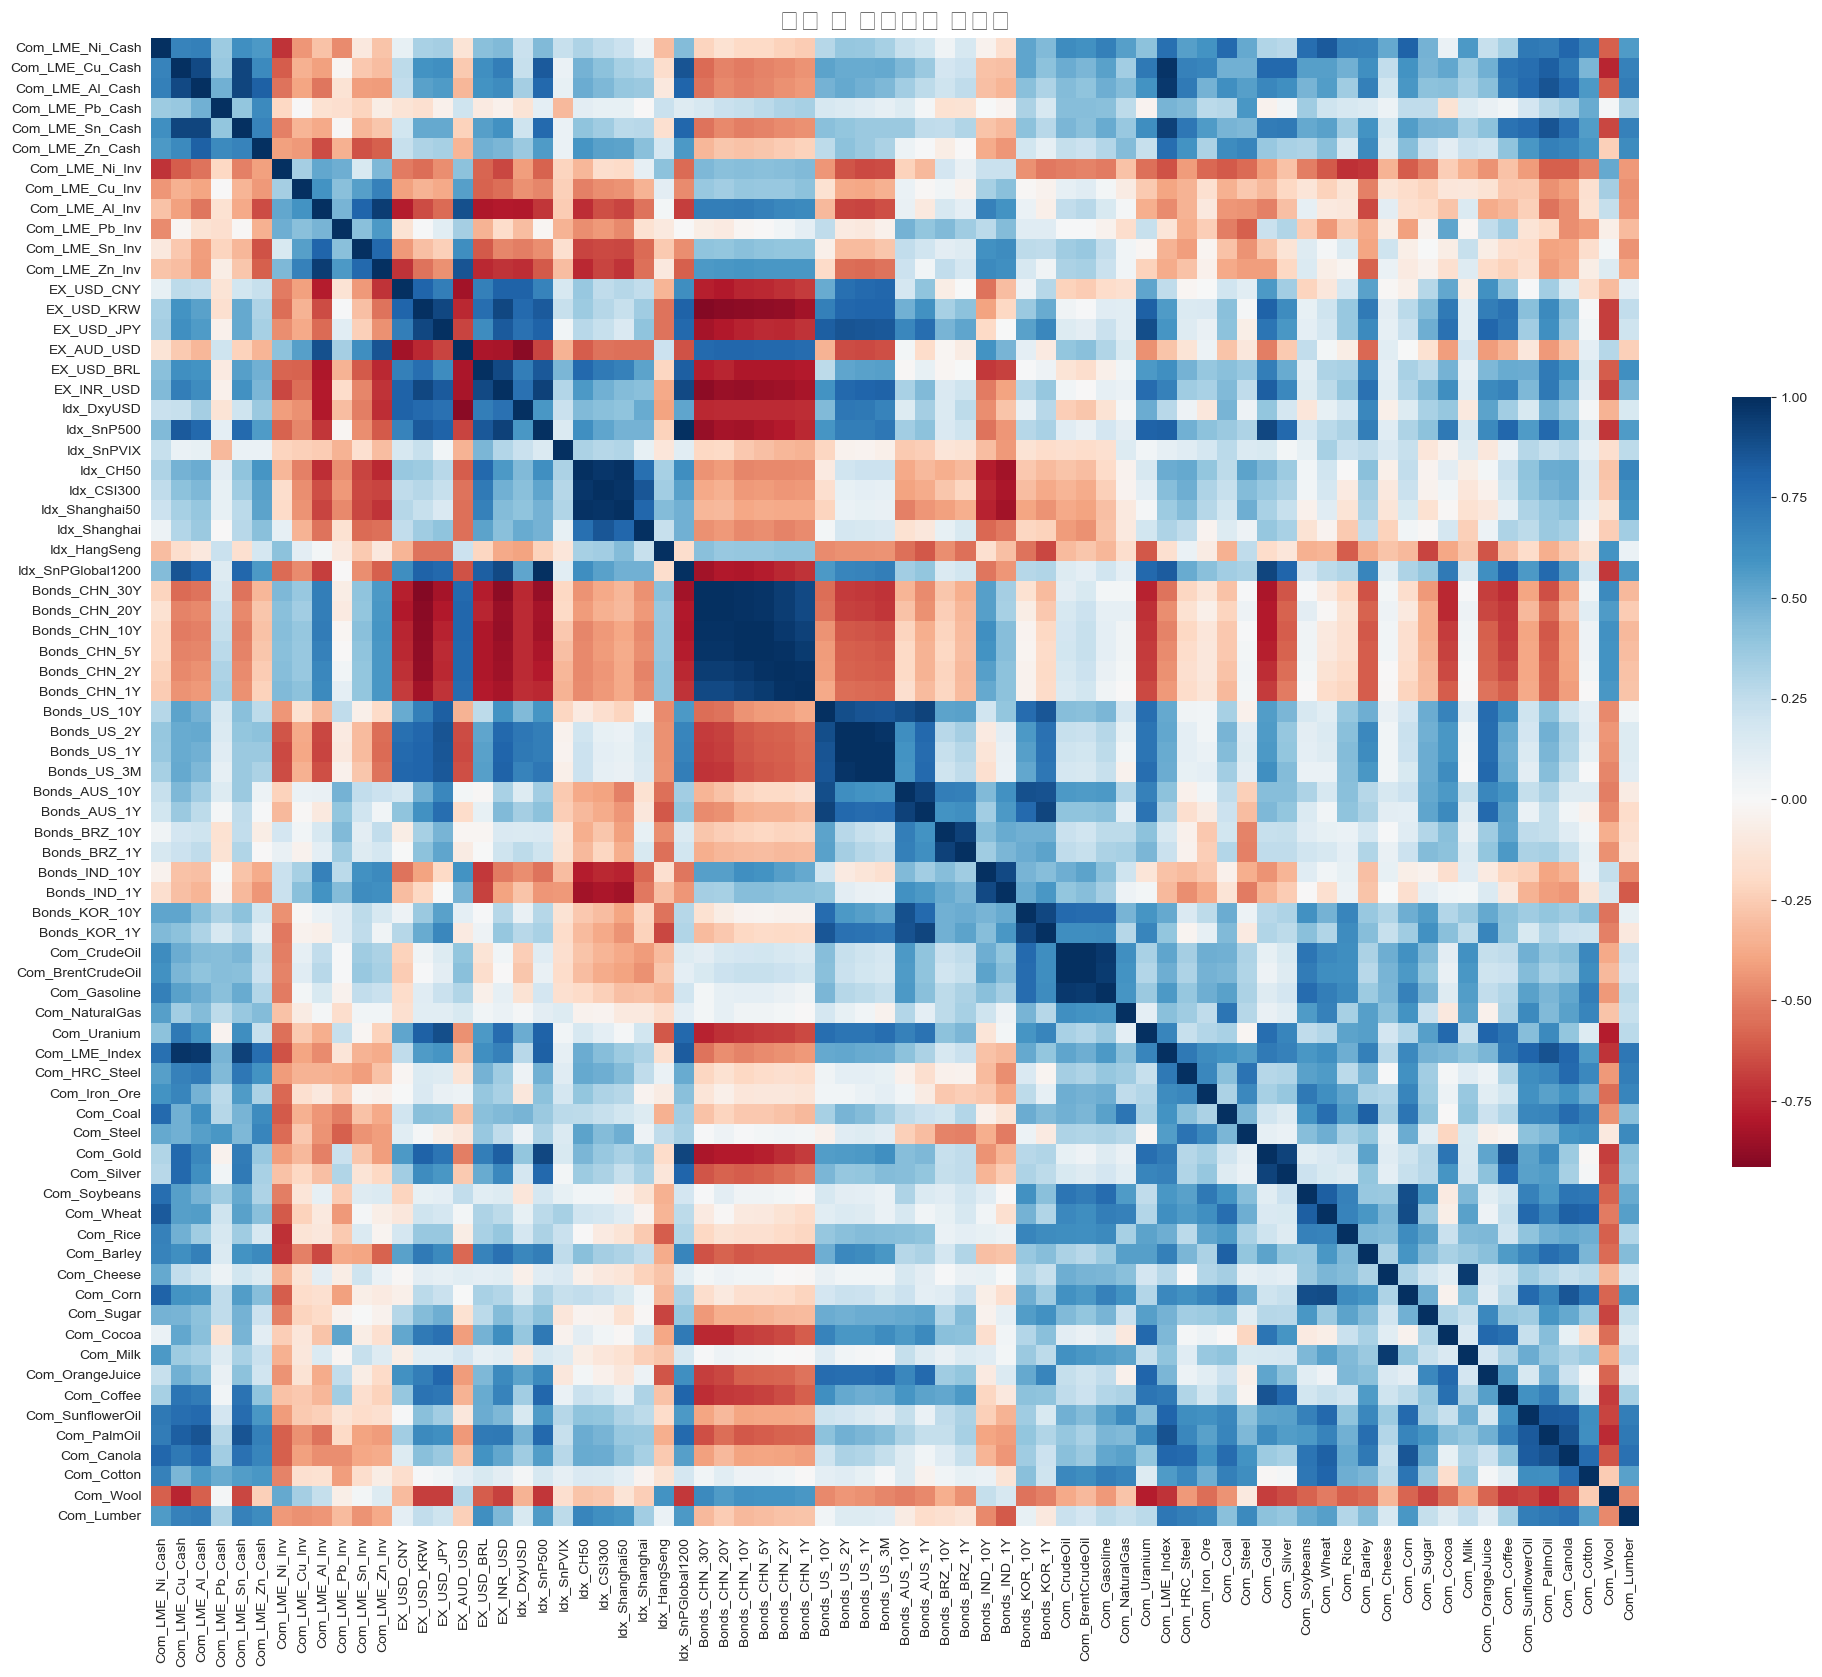

In [6]:
# 상관계수 행렬 계산
corr = df.corr()

# 히트맵 시각화
plt.figure(figsize=(24, 20))
sns.heatmap(corr, cmap='RdBu', center=0, square=True, annot=False, cbar_kws={"shrink": .5})
plt.title('변수 간 상관관계 히트맵', fontsize=20)
plt.show()

In [7]:
# 상위 20개 상관관계 (절대값 기준, 자기 자신 제외)
corr_unstacked = corr.unstack()
corr_sorted = corr_unstacked.sort_values(kind="quicksort", ascending=False)

print("상위 10개 양의 상관관계:")
print(corr_sorted[corr_sorted < 1.0].head(10))

print("\n상위 10개 음의 상관관계:")
print(corr_sorted.head(10)) # 실제 음의 상관관계 확인을 위해 tail 사용
print(corr_sorted.tail(10))

상위 10개 양의 상관관계:
Idx_SnP500         Idx_SnPGlobal1200    0.996772
Idx_SnPGlobal1200  Idx_SnP500           0.996772
Bonds_US_2Y        Bonds_US_1Y          0.993848
Bonds_US_1Y        Bonds_US_2Y          0.993848
Com_CrudeOil       Com_BrentCrudeOil    0.993003
Com_BrentCrudeOil  Com_CrudeOil         0.993003
Bonds_CHN_10Y      Bonds_CHN_5Y         0.991083
Bonds_CHN_5Y       Bonds_CHN_10Y        0.991083
Bonds_CHN_30Y      Bonds_CHN_20Y        0.990689
Bonds_CHN_20Y      Bonds_CHN_30Y        0.990689
dtype: float64

상위 10개 음의 상관관계:
Com_LME_Ni_Cash    Com_LME_Ni_Cash      1.0
Bonds_AUS_10Y      Bonds_AUS_10Y        1.0
Idx_CH50           Idx_CH50             1.0
Idx_CSI300         Idx_CSI300           1.0
Idx_Shanghai50     Idx_Shanghai50       1.0
Idx_Shanghai       Idx_Shanghai         1.0
Idx_HangSeng       Idx_HangSeng         1.0
Idx_SnPGlobal1200  Idx_SnPGlobal1200    1.0
Bonds_CHN_30Y      Bonds_CHN_30Y        1.0
Bonds_CHN_20Y      Bonds_CHN_20Y        1.0
dtype: float64
EX_INR_

## 5. EDA: 시계열 추세 시각화

/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWa

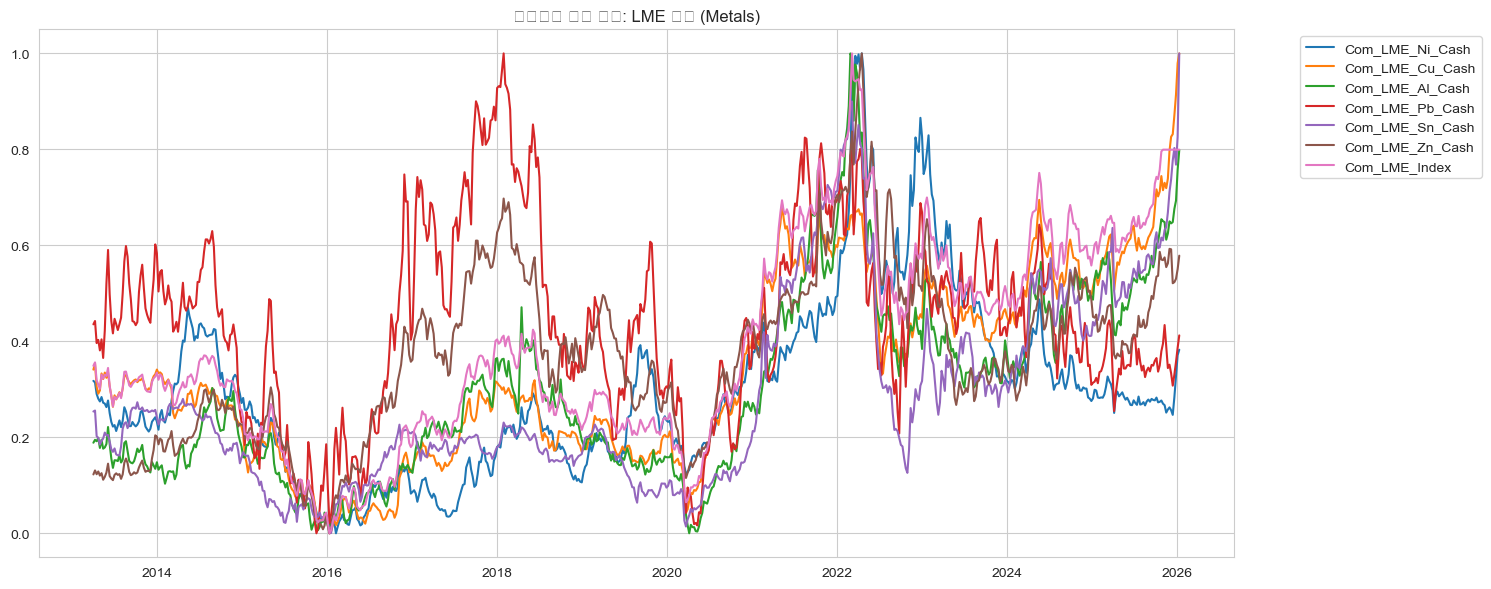

/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


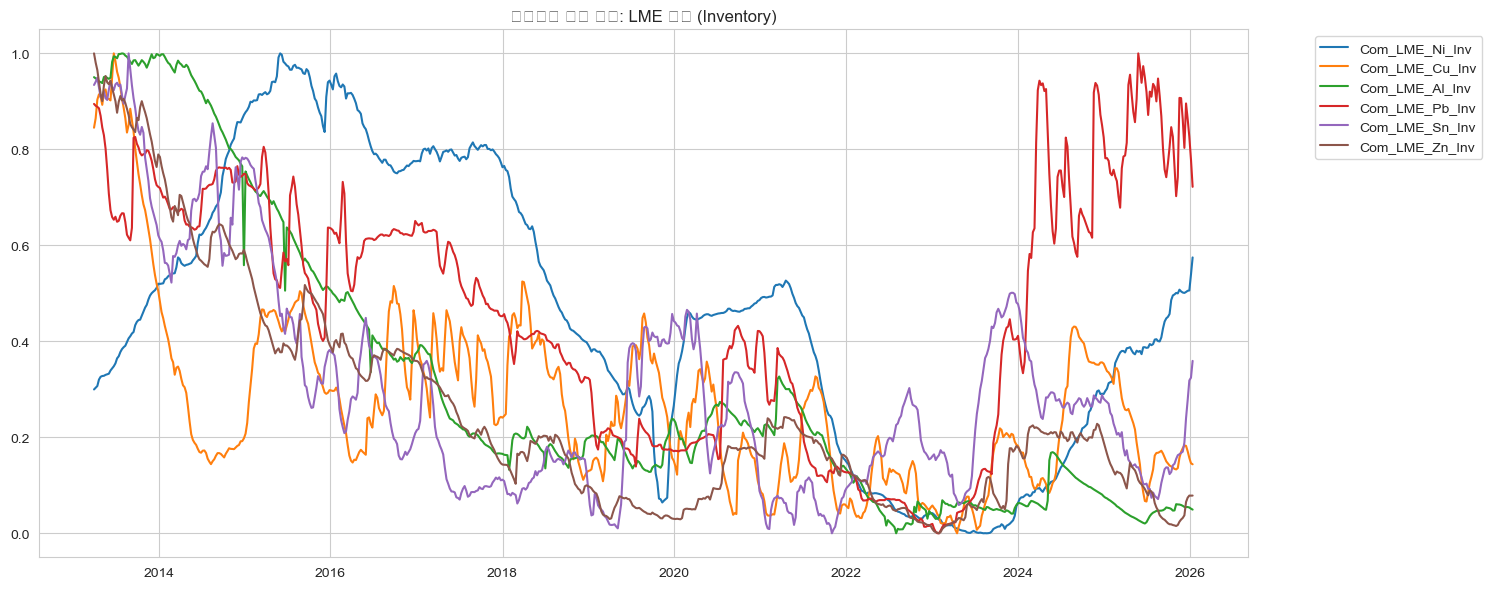

/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packag

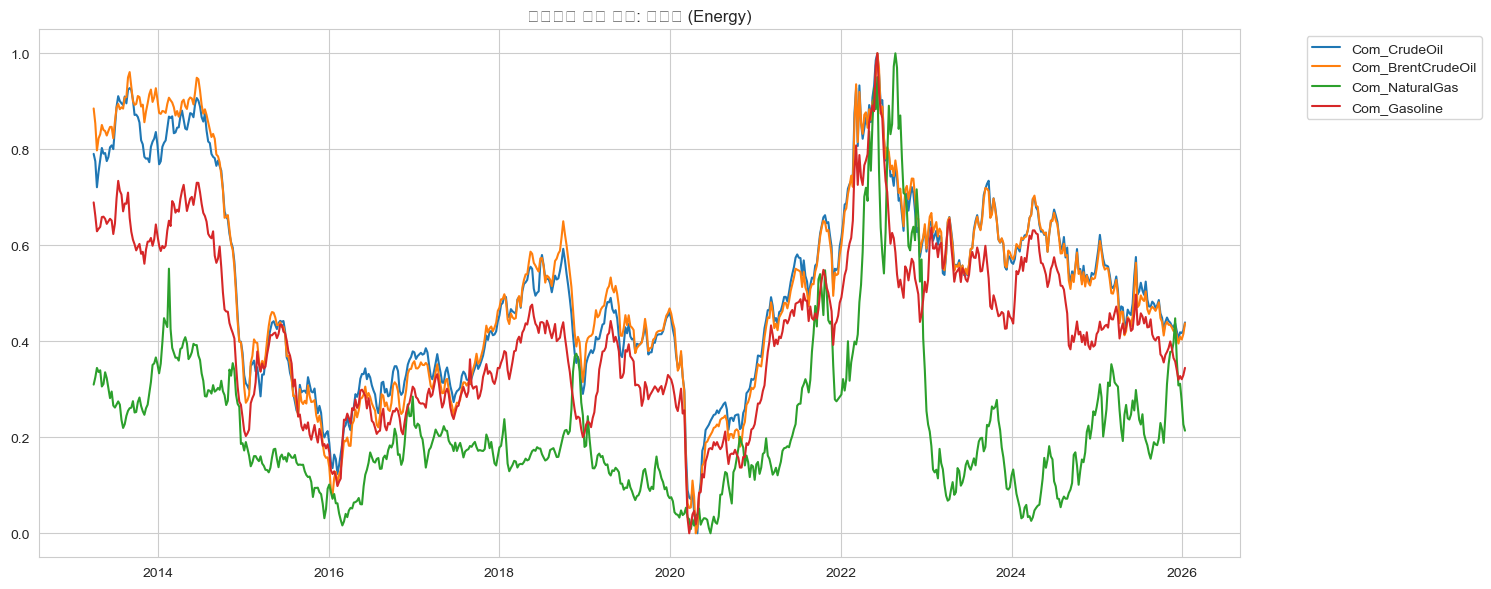

/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/kw/2yp1vxc13j598z_jr_jghrz80000gn/T/ipykernel_35081/1272818119.py:8: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/IPython/core/pyla

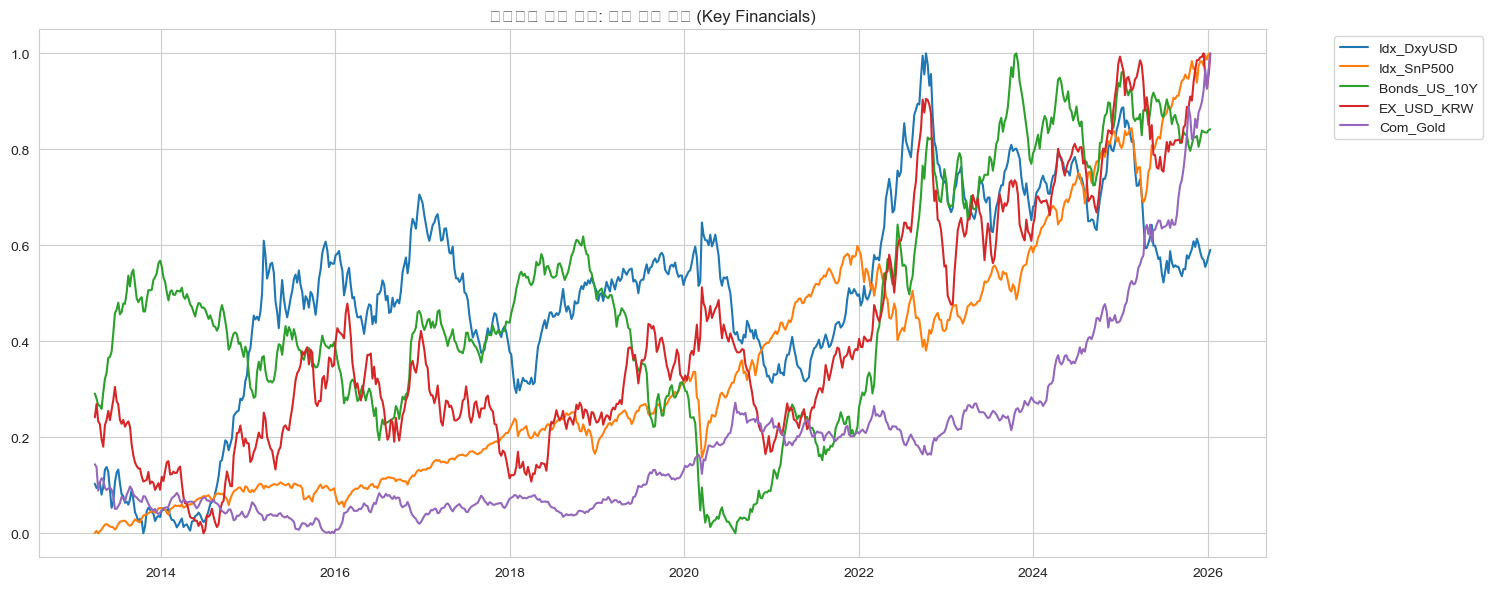

In [8]:
def plot_group(columns, title):
    plt.figure(figsize=(15, 6))
    for col in columns:
        if col in df_scaled.columns:
            plt.plot(df_scaled.index, df_scaled[col], label=col)
    plt.title(f'정규화된 추세 비교: {title}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 그룹 정의
groups = {
    'LME 금속 (Metals)': [c for c in df.columns if 'Com_LME' in c and 'Inv' not in c],
    'LME 재고 (Inventory)': [c for c in df.columns if 'Com_LME' in c and 'Inv' in c],
    '에너지 (Energy)': ['Com_CrudeOil', 'Com_BrentCrudeOil', 'Com_NaturalGas', 'Com_Gasoline'],
    '주요 금융 지표 (Key Financials)': ['Idx_DxyUSD', 'Idx_SnP500', 'Bonds_US_10Y', 'EX_USD_KRW', 'Com_Gold']
}

for name, cols in groups.items():
    plot_group(cols, name)